## Quick test for the cloud module dropsonde files

Test output of ```p3cld_product_dropsnds.py```.

In [44]:
import os

import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

%matplotlib inline

All cloud module dropsonde filenames

In [15]:
dir_drpsnds = "./cldmod_datafiles/"
fnames = [f for f in os.listdir(dir_drpsnds) 
          if f.startswith("p3cld_dropsondes") and f.endswith(".nc") 
         ]

Print contents of first file

In [16]:
f = fnames[0]
data = xr.load_dataset(dir_drpsnds + f)
print(data)

<xarray.Dataset>
Dimensions:          (alt: 1001, nv: 2, sounding: 2)
Coordinates:
  * alt              (alt) int32 0 10 20 30 40 50 ... 9960 9970 9980 9990 10000
  * sounding         (sounding) int32 821 822
    launch_time      (sounding) datetime64[ns] 2020-01-17T17:25:20 2020-01-17...
    lat              (sounding, alt) float32 nan 15.36 15.36 ... nan nan nan
    lon              (sounding, alt) float32 nan -50.01 -50.01 ... nan nan nan
Dimensions without coordinates: nv
Data variables:
    alt_bnds         (alt, nv, sounding) float64 -5.0 -5.0 ... 1.000e+04
    low_height_flag  (sounding) float64 1.0 1.0
    p                (sounding, alt) float32 nan 1.015e+05 1.014e+05 ... nan nan
    ta               (sounding, alt) float32 nan 298.3 298.2 ... nan nan nan
    rh               (sounding, alt) float32 nan 0.7605 0.7591 ... nan nan nan
    wspd             (sounding, alt) float32 nan 6.399 6.514 ... nan nan nan
    wdir             (sounding, alt) float32 nan 75.87 75.25 ... nan

In [17]:
print(data)

<xarray.Dataset>
Dimensions:          (alt: 1001, nv: 2, sounding: 2)
Coordinates:
  * alt              (alt) int32 0 10 20 30 40 50 ... 9960 9970 9980 9990 10000
  * sounding         (sounding) int32 821 822
    launch_time      (sounding) datetime64[ns] 2020-01-17T17:25:20 2020-01-17...
    lat              (sounding, alt) float32 nan 15.36 15.36 ... nan nan nan
    lon              (sounding, alt) float32 nan -50.01 -50.01 ... nan nan nan
Dimensions without coordinates: nv
Data variables:
    alt_bnds         (alt, nv, sounding) float64 -5.0 -5.0 ... 1.000e+04
    low_height_flag  (sounding) float64 1.0 1.0
    p                (sounding, alt) float32 nan 1.015e+05 1.014e+05 ... nan nan
    ta               (sounding, alt) float32 nan 298.3 298.2 ... nan nan nan
    rh               (sounding, alt) float32 nan 0.7605 0.7591 ... nan nan nan
    wspd             (sounding, alt) float32 nan 6.399 6.514 ... nan nan nan
    wdir             (sounding, alt) float32 nan 75.87 75.25 ... nan

Plot all dropsondes

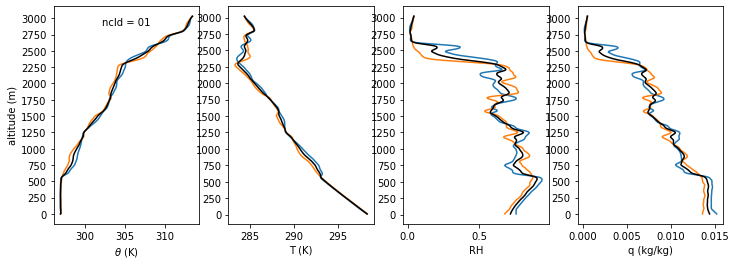

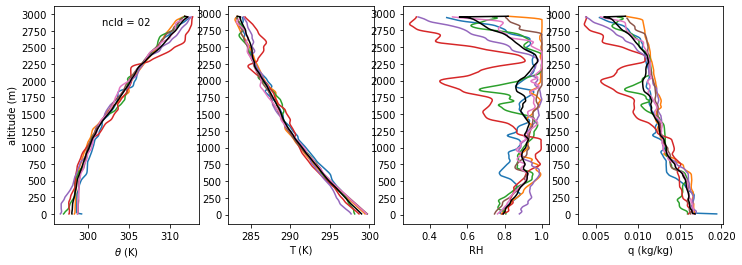

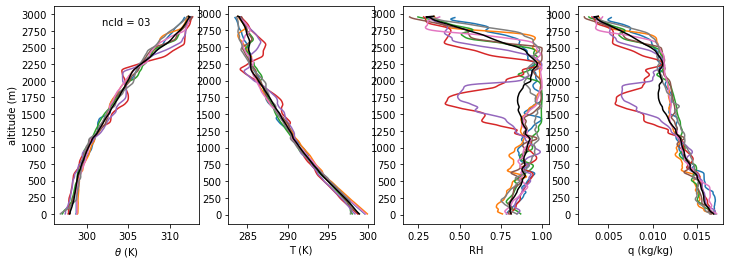

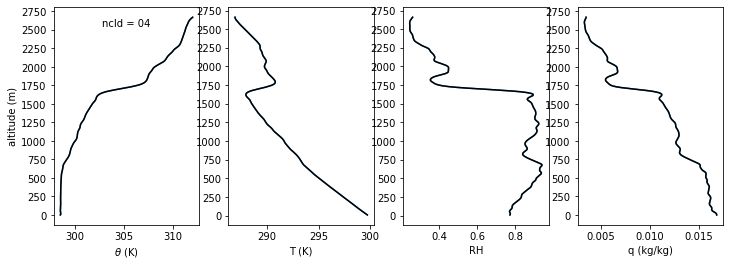

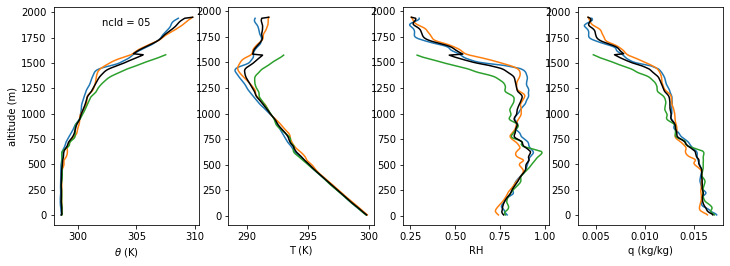

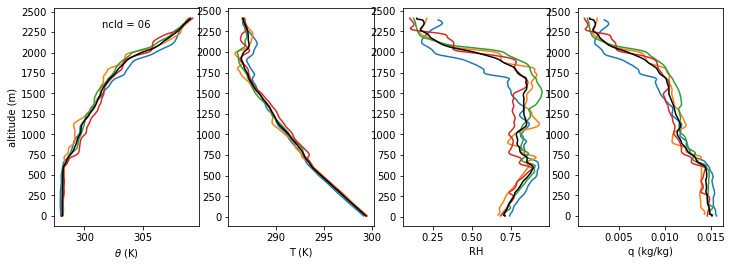

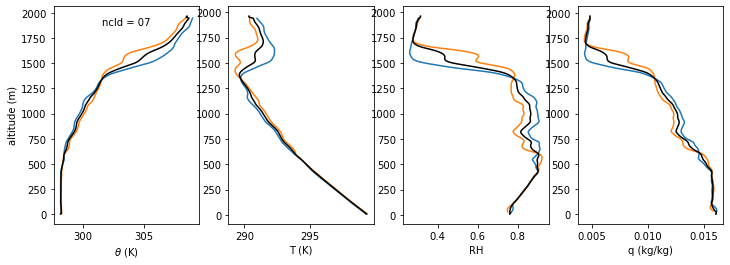

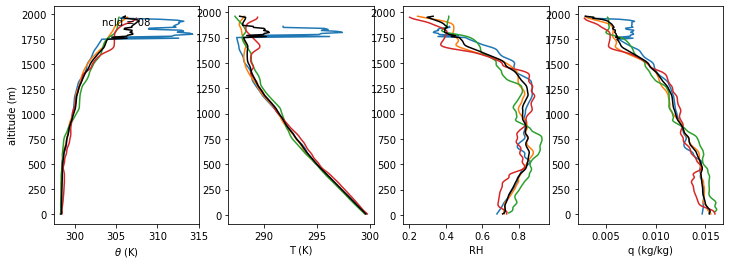

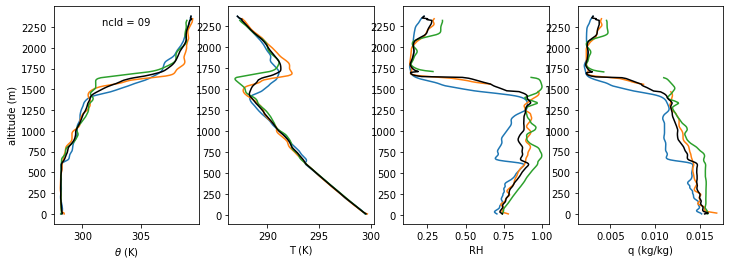

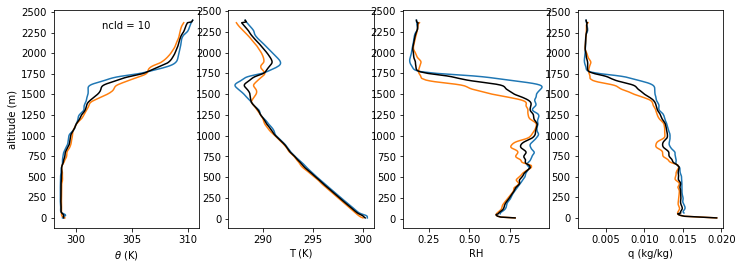

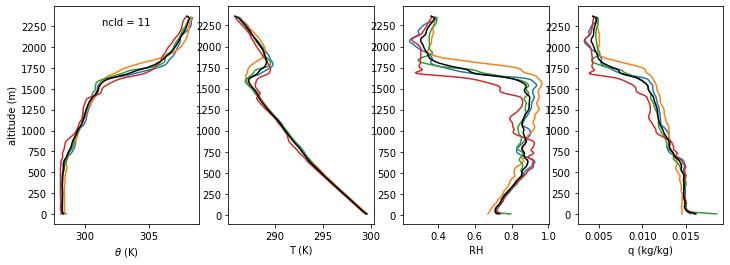

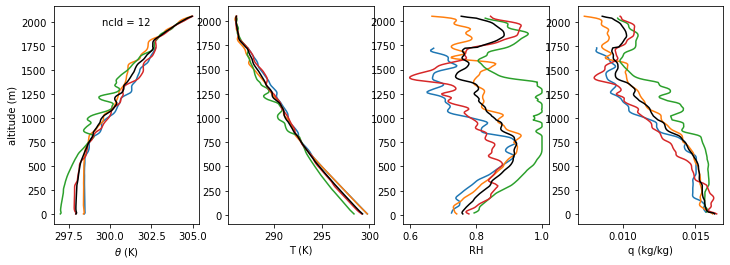

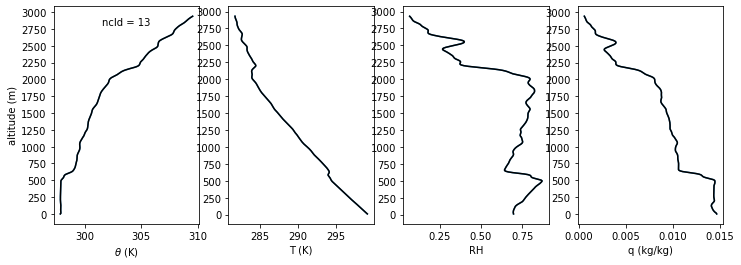

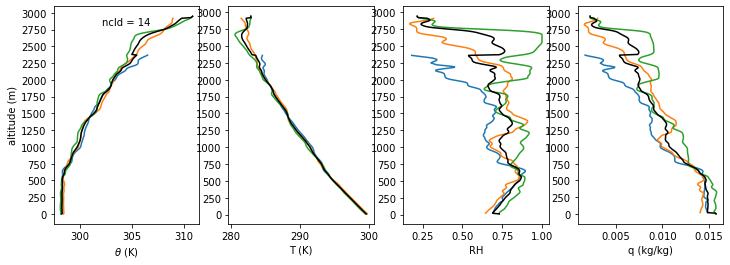

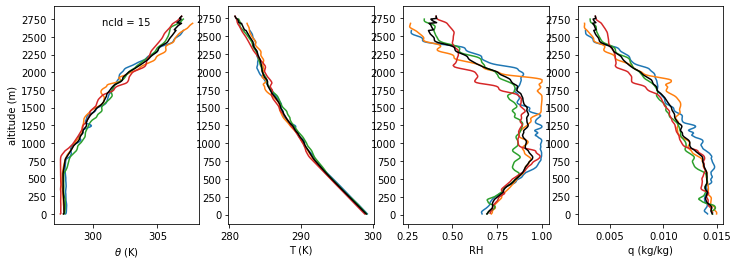

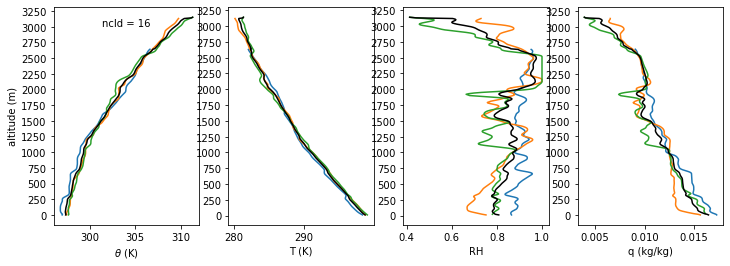

In [45]:
varplotkeys = ['theta', 'ta', 'rh', 'q']

for f in fnames:
    data = xr.load_dataset(dir_drpsnds + f)
    
    fig, axes = plt.subplots(1, 4, figsize=(12,4))
    
    for nsonde in data['sounding'].values:
        
        data_sonde = data.sel(sounding=nsonde)
    
        for varkey, ax in zip(varplotkeys, axes):
            ax.plot(data_sonde[varkey], data_sonde['alt'])
            ax.set_yticks(np.arange(0, 3251, 250))
            
    axes[0].set_xlabel(r"$\theta$ (K)")
    axes[1].set_xlabel(r"T (K)")
    axes[2].set_xlabel(r"RH")
    axes[3].set_xlabel(r"q (kg/kg)")
    axes[0].set_ylabel(r"altitude (m)")
    
    
    ncld = f[f.index('_ncld')+5: f.index('_ncld')+7]
    axes[0].text(0.5, 0.95, "ncld = %s" % ncld,
                ha='center', va='top', transform=axes[0].transAxes
                )
    
    # Mean profiles:
    meanprfs = data.mean(dim='sounding')
    for varkey, ax in zip(varplotkeys, axes):
        ax.plot(meanprfs[varkey], meanprfs['alt'], c='black')